In [26]:
##This code is for comparing minimisation performance of SGD and convex formulation in random setting
##regression (squared loss), random design
##Run for multiple independent trials

##Convex formulation based on the idea from the paper
## "Neural Networks are Convex Regularizers: Exact Polynomial-time Convex Optimization Formulations for Two-layer Networks"
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import torch

In [27]:
def relu(x):
    return np.maximum(0,x)
def drelu(x):
    return x>=0

d=2 # dimension of the data
beta=1e-3 # regularization parameter

# Adjust variables for each experiment (Both Convex Formulation and SGD)
num_trials=15 # number of independent trials
n=5 # number of random samples to be collected

# Adjust variables for each experiment (SGD)
m=50 # number of neurons
num_epochs = 6000 # number of iterations for SGD

learning_rate = 0.01

In [28]:
# Store minimised values for each trial
all_min=[]

In [29]:
# Track the minimised values for plotting

for trial in range(num_trials):
    # Set random seed for reproducibility
    torch.manual_seed(2025+trial)
    np.random.seed(2025+trial)
    X = torch.rand(n, 2) * 10 - 5 # Random 2D input in range [-5, 5)
    # Create Y based on the first element of each row in X
    Y = torch.where(X[:, 0] > X[:,1], torch.tensor(1), torch.tensor(-1))
    X=X.numpy()
    Y=Y.numpy()

    # Matrix to store hyperplane arrangements for X
    dmat=np.empty((n,0))
    # Finite approximation of all possible sign patterns
    for i in range(int(1e5)):
        u=np.random.randn(d,1)
        # u is a 2D array of shape (d, 1) filled with random floats sampled from a standard normal distribution (mean = 0, standard deviation = 1)
        dmat=np.append(dmat,drelu(np.dot(X,u)),axis=1)
        # The function appends the result of drelu(np.dot(X, u)) as a new column to the right of the dmat array.

    dmat=(np.unique(dmat,axis=1))
    m1=dmat.shape[1] #number of columns in dmat

    # Uopt1 and Uopt2 to represent parameters to be optimised
    Uopt1=cp.Variable((d,m1))
    Uopt2=cp.Variable((d,m1))

    # yopt1 and yopt2 to represent a fixed vector DXv and DXt
    yopt1=cp.Parameter((n,1))
    yopt2=cp.Parameter((n,1))
    yopt1=cp.sum(cp.multiply(dmat,(X*Uopt1)),axis=1)
    yopt2=cp.sum(cp.multiply(dmat,(X*Uopt2)),axis=1)

    # We use MSE+regularization term as a performance metric
    cost=cp.sum((Y - (yopt1 - yopt2))**2)/n + (beta/2)*(cp.norm(Uopt1, 'fro')**2 + cp.norm(Uopt2, 'fro')**2)
    # Add constraints
    constraints=[]
    constraints+=[cp.multiply((2*dmat-np.ones((n,m1))),(X*Uopt1))>=0]
    constraints+=[cp.multiply((2*dmat-np.ones((n,m1))),(X*Uopt2))>=0]

    # Solve convex program
    prob=cp.Problem(cp.Minimize(cost),constraints)
    prob.solve()
    cvx_opt=prob.value
    print(f"Trial {trial+1}: Convex Formulation Objective Value: {cvx_opt}")

    # Store minimised value
    all_min.append(cvx_opt)

/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 61 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 62 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 1: Convex Formulation Objective Value: 0.0006222287957940906


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 65 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 66 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 2: Convex Formulation Objective Value: 0.0007978993840909133


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 69 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 70 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 3: Convex Formulation Objective Value: 0.002790404173608096


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 73 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 74 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 4: Convex Formulation Objective Value: 0.08004432988113751


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 77 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 78 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 5: Convex Formulation Objective Value: 0.0001238778012889842


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 81 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 82 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 6: Convex Formulation Objective Value: 0.003165677518468072


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 85 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 86 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 7: Convex Formulation Objective Value: 0.0009853458319434723


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 89 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 90 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 8: Convex Formulation Objective Value: 0.0604644759730865


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 93 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 94 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 9: Convex Formulation Objective Value: 2.521630023133378e-05


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 97 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 98 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

Trial 10: Convex Formulation Objective Value: 0.005189540114888422


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 101 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 102 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 11: Convex Formulation Objective Value: 0.00013603734979146376


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 105 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 106 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 12: Convex Formulation Objective Value: 7.672710622962895e-05


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 109 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 110 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 13: Convex Formulation Objective Value: 6.56301303336186e-05


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 113 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 114 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

Trial 14: Convex Formulation Objective Value: 0.00030887515271642714
Trial 15: Convex Formulation Objective Value: 0.0011877873154770323


/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 117 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cvxpy/expressions/expression.py:674: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 118 times so far.

  warnings.warn(msg, UserWarning)
/usr/local/lib/python3

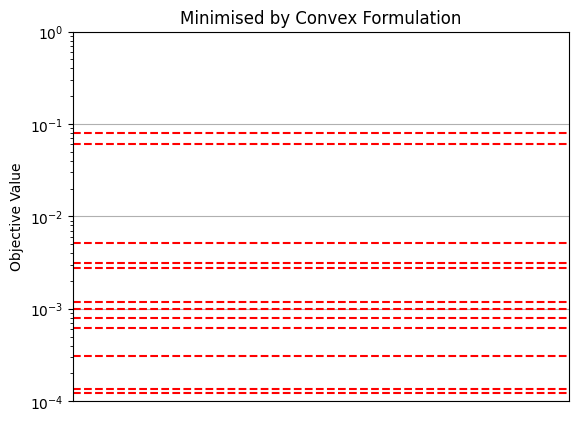

In [30]:
# Plot the log of minimized values
fig, ax = plt.subplots() # Create a figure and axes object

for trial in range(num_trials):
    ax.axhline(y=all_min[trial], linestyle='--', color='r')

ax.set_ylim(bottom=1e-4, top=1)
ax.set_ylabel('Objective Value')
ax.set_title(f'Minimised by Convex Formulation')
ax.set_xticks([])

ax.grid(True)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

plt.show()

In [31]:
##2-layer ReLU with weight decay
import torch.nn as nn
import torch.optim as optim

In [32]:
# Define the Neural Network model with 2 layers
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim, bias=False)  # First layer
        self.layer2 = nn.Linear(hidden_dim, output_dim, bias=False)  # Second layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # ReLU activation function applied after the first layer
        x = self.layer2(x)  # Output layer (no activation)
        return x

In [33]:
# Set dimensions
input_dim = 2   # 2D input
hidden_dim = m  # Hidden layer dimension
output_dim = 1  # 1D output (binary classification)

In [34]:
# Define Mean Squared Error (MSE) loss and add weight decay (L2 regularization)
criterion = nn.MSELoss()

In [35]:
# Store losses for each trial
all_losses = []


In [36]:
# Track the loss values for plotting

for trial in range(num_trials):
    # Set random seed for reproducibility
    torch.manual_seed(trial)
    np.random.seed(trial)
    # Generate random dataset with n samples
    X = torch.rand(n, 2) * 10 - 5 # Random 2D input in range [-5, 5) times [-5, 5)
    # Create Y based on the first element of each row in X
    Y = torch.where(X[:, 0] > X[:,1], torch.tensor(1), torch.tensor(-1))
    X = X.float()
    Y = Y.float()

    # Initialize model and optimizer
    model = SimpleNN(input_dim, hidden_dim, output_dim)
    # Using SGD optimizer with weight decay
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=beta)  # weight_decay is the L2 penalty
    # Training loop
    trial_losses = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

        trial_losses.append(loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()))
        # Optionally print loss every 100 epochs
        if (epoch + 1) % num_epochs == 0:
          print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()+(beta/2)*sum(param.pow(2).sum().item() for param in model.parameters()):.4f}')

    all_losses.append(trial_losses)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [6000/6000], Loss: 0.0264
Epoch [6000/6000], Loss: 0.9709
Epoch [6000/6000], Loss: 0.0072
Epoch [6000/6000], Loss: 0.9677
Epoch [6000/6000], Loss: 0.9725
Epoch [6000/6000], Loss: 0.9676
Epoch [6000/6000], Loss: 0.9670
Epoch [6000/6000], Loss: 0.9668
Epoch [6000/6000], Loss: 0.9678
Epoch [6000/6000], Loss: 0.6477
Epoch [6000/6000], Loss: 0.6965
Epoch [6000/6000], Loss: 0.9669
Epoch [6000/6000], Loss: 0.6483
Epoch [6000/6000], Loss: 0.9678
Epoch [6000/6000], Loss: 0.9676


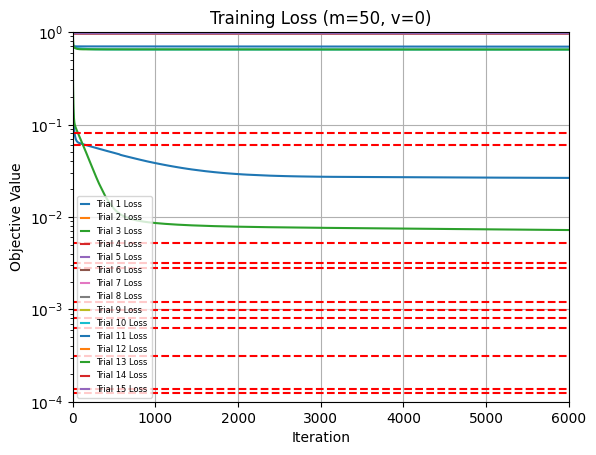

In [37]:
# Plot the log of trial loss over the number of epochs
fig, ax = plt.subplots() # Create a figure and axes object

for trial in range(num_trials):
    ax.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-') # Plot on the axes object
    # Plot a horizontal line indicating the optimal value
    ax.axhline(y=all_min[trial], color='r', linestyle='--')
ax.set_ylim(bottom=1e-4, top=1.0)
ax.set_xlim(left=0, right=num_epochs)
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective Value')
ax.set_title(f'Training Loss (m={m}, v=0)')

ax.grid(True)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Display the legend
ax.legend(loc='lower left',prop={'size': 6}, borderpad=0.5, handlelength=1, handleheight=0.5)


plt.show()

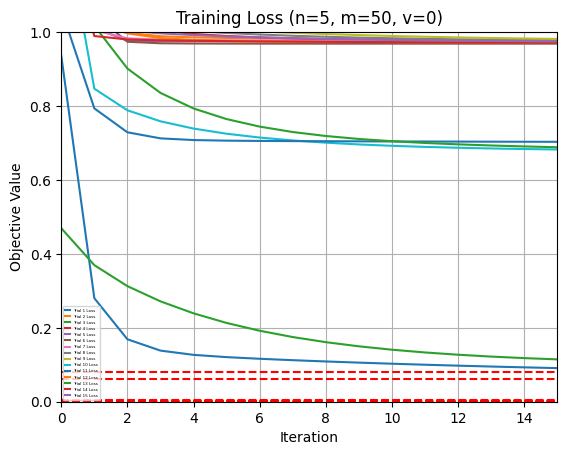

In [38]:
# Plot the loss over the number of epochs
for trial in range(num_trials):
    plt.plot(range(num_epochs), all_losses[trial], label=f'Trial {trial + 1} Loss', linestyle='-')
    plt.axhline(y=all_min[trial], color='r', linestyle='--')

plt.ylim(bottom=0, top=1)
plt.xlim(left=0, right=num_trials)
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.title(f'Training Loss (n={n}, m={m}, v=0)')

plt.grid(True)

# Display the legend
plt.legend(loc='lower left',prop={'size': 3}, borderpad=0.5, handlelength=1, handleheight=0.5)

plt.show()

In [39]:
#Set p to see how many trials is over p
p=0.2

# Get the last loss value of each trial (representing the final loss)
final_losses = [trial_losses[-1] for trial_losses in all_losses]
count = sum(1 for loss in final_losses if loss > p)
print(f'The number of trial with training loss over {p}: ',count)

The number of trial with training loss over 0.2:  13
